problem statement:
    FLIGHT PRICE PREDICTION
Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest 
available ticket on a given flight gets more and less expensive over time. This usually happens as 
an attempt to maximize revenue based on -
1. Time of purchase patterns (making sure last-minute purchases are expensive)
2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order 
to reduce sales and hold back inventory for those expensive last-minute expensive 
purchases)
So, you have to work on a project where you collect data of flight fares with other features and 
work to make a model to predict fares of flights.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Flight_price_dataset.csv')
df

,Unnamed: 0,Airlines,Aerplane,Date,Depature_Time,Arrival_time,Source,Destination,Stops,Duration,Price
0,0,Air India,AI-887,"Sun, 7 Aug 2022",07:00,09:05,New Delhi,Mumbai,Non Stop,2h 05m,8465
1,1,Air India,AI-665,"Sun, 7 Aug 2022",08:00,10:10,New Delhi,Mumbai,Non Stop,2h 10m,8465
2,2,Air India,AI-805,"Sun, 7 Aug 2022",20:00,22:10,New Delhi,Mumbai,Non Stop,2h 10m,8465
3,3,Air India,AI-678,"Sun, 7 Aug 2022",09:00,11:15,New Delhi,Mumbai,Non Stop,2h 15m,8465
4,4,Air India,AI-624,"Sun, 7 Aug 2022",19:00,21:15,New Delhi,Mumbai,Non Stop,2h 15m,8465
...,...,...,...,...,...,...,...,...,...,...,...
1516,1516,Air India Business,AI-865,"Sun, 14 Aug 2022",10:00,12:35,New Delhi,Mumbai,Non Stop,2h 35m,22337
1517,1517,Air India Business,AI-636,"Sun, 14 Aug 2022",14:30,18:10,New Delhi,Mumbai,1 Stop,3h 40m,22337
1518,1518,Air India Business,AI-441,"Sun, 14 Aug 2022",17:55,22:10,New Delhi,Mumbai,1 Stop,4h 15m,22337
1519,1519,Air India Business,AI-475/646,"Sun, 14 Aug 2022",12:55,13:35\n+ 1 day,New Delhi,Mumbai,1 Stop,24h 40m,29847


In [3]:
#Dataset Shape
df.shape

(1521, 11)

There are 1521 rows and 11 columns present in the dataset

In [4]:
df.columns

Index(['Unnamed: 0', 'Airlines', 'Aerplane', 'Date', 'Depature_Time',
       'Arrival_time', 'Source', 'Destination', 'Stops', 'Duration', 'Price'],
      dtype='object')

In [5]:
df.dtypes

Unnamed: 0        int64
Airlines         object
Aerplane         object
Date             object
Depature_Time    object
Arrival_time     object
Source           object
Destination      object
Stops            object
Duration         object
Price             int64
dtype: object

Here we are having 2 integer columns unnamed and Price and the remaining are object type

The Date column is of object type we should change it to Date datatype 
Depature_Time and Arrival_time is also object type we should change it to Date_Time type
Stops column should also change

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1521 entries, 0 to 1520
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     1521 non-null   int64 
 1   Airlines       1521 non-null   object
 2   Aerplane       1521 non-null   object
 3   Date           1521 non-null   object
 4   Depature_Time  1521 non-null   object
 5   Arrival_time   1521 non-null   object
 6   Source         1521 non-null   object
 7   Destination    1521 non-null   object
 8   Stops          1521 non-null   object
 9   Duration       1521 non-null   object
 10  Price          1521 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 77.3+ KB


There are 2 integer type of columns and 9 object type of columns present in the data 

#### Data Integrity Checking

Dataset contains white spaces,?,missing values now we will check for them

In [7]:

df.duplicated().sum()

0

In [8]:
df.isin([' ','?','-','null','NA']).sum().any()

False

In [9]:
df.isnull().sum()

Unnamed: 0       0
Airlines         0
Aerplane         0
Date             0
Depature_Time    0
Arrival_time     0
Source           0
Destination      0
Stops            0
Duration         0
Price            0
dtype: int64

There are no null values present in the dataset

In [10]:
# droping unnamed:0 column
df.drop(columns='Unnamed: 0',inplace=True)

<AxesSubplot:>

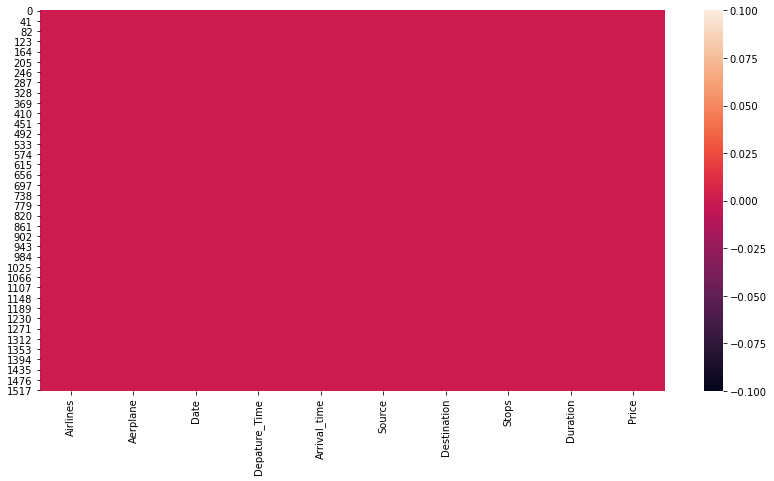

In [11]:
plt.figure(figsize=(14,7))
sns.heatmap(df.isnull())

There is no missing values present in the dataset

#### Data Preprocessing

convert Duration column hr & minutes format to minutes

In [12]:
df['Duration']=df['Duration'].map(lambda x: x.replace('05m','5m'))

In [13]:
#convertion of Duration column from hr & minutes format to minutes
df['Duration']=df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [14]:
#Convert Duration column into numeric datatype
df['Duration']=pd.to_numeric(df['Duration'])

Create new column for day & date

In [15]:
df['Day']=df['Date'].map(lambda x:x[:3])
df['Date']=df['Date'].map(lambda x:x[4:])

In [16]:
categorical=['Airlines','Day','Stops','Aerplane']

In [17]:
pd.set_option('display.max_rows',None)
for i in categorical:
    print(i)
    print(df[i].value_counts())
    print("="*100)

Airlines
IndiGo                326
Vistara               288
Vistara Business      255
Air India             196
Air India Business    173
Go First              121
SpiceJet              110
Air Asia               52
Name: Airlines, dtype: int64
Day
Mon    251
Sun    247
Sat    228
Fri    206
Wed    201
Tue    198
Thu    190
Name: Day, dtype: int64
Stops
1 Stop       975
Non Stop     531
2 Stop(s)     15
Name: Stops, dtype: int64
Aerplane
AI-665          17
AI-678          17
AI-805          17
UK-951          17
AI-441          17
AI-605          17
AI-887          17
UK-985          15
UK-929/936      15
UK-969/936      15
UK-977          15
UK-943          15
UK-963          15
AI-865          15
UK-933          15
UK-969/918      15
UK-929/918      15
AI-636          15
UK-945          14
UK-953          14
UK-995          14
UK-927          14
UK-706/652      13
AI-811/626      13
UK-969/956      13
UK-959/918      13
UK-637/652      13
AI-624          13
UK-993          13
UK-955

In [18]:
df.describe()

,Duration,Price
count,1521.000000,1521.000000
mean,525.943458,17769.464168
std,434.662695,12869.727263
min,120.000000,8465.000000
25%,135.000000,8579.000000
50%,385.000000,11843.000000
75%,760.000000,22297.000000
max,1705.000000,74713.000000


describe method tells us minimum price is 8465 and maximum price is 74713 

In [19]:
df.describe(include=object)

,Airlines,Aerplane,Date,Depature_Time,Arrival_time,Source,Destination,Stops,Day
count,1521,1521,1521,1521,1521,1521,1521,1521,1521
unique,8,255,9,114,145,1,1,3,7
top,IndiGo,AI-665,13 Aug 2022,07:20,08:40\n+ 1 day,New Delhi,Mumbai,1 Stop,Mon
freq,326,17,228,55,45,1521,1521,975,251


# EDA

Exploring Airlines types

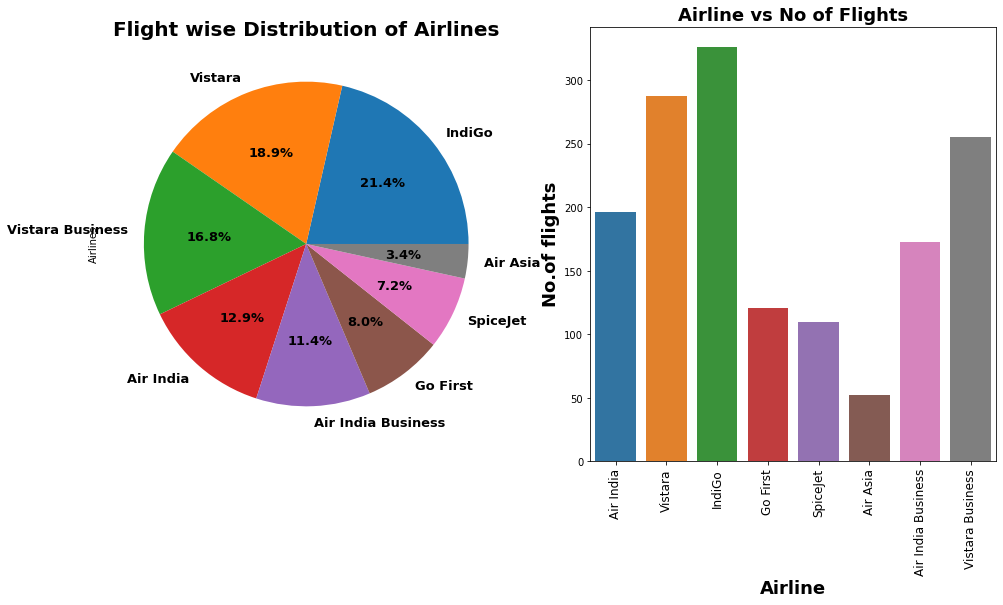

In [20]:
#plt.rcparams["figure.autolayout"]
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Airlines'].value_counts().plot.pie(autopct='%2.1f%%',textprops={ 'fontsize':13,'fontweight':'bold'},ax=ax[0])
ax[0].set_title("Flight wise Distribution of Airlines",fontsize=20,fontweight='bold')
sns.countplot('Airlines',data=df,ax=ax[1])
ax[1].set_title('Airline vs No of Flights',fontsize=18,fontweight='bold')
ax[1].set_xlabel("Airline",fontsize=18,fontweight='bold')
ax[1].set_ylabel("No.of flights",fontsize=18,fontweight='bold')
plt.xticks(fontsize=12,rotation=90)
plt.show()


we observe that maximum number of flights run by Vistara premium Economy while minimum flights run by AirAsia

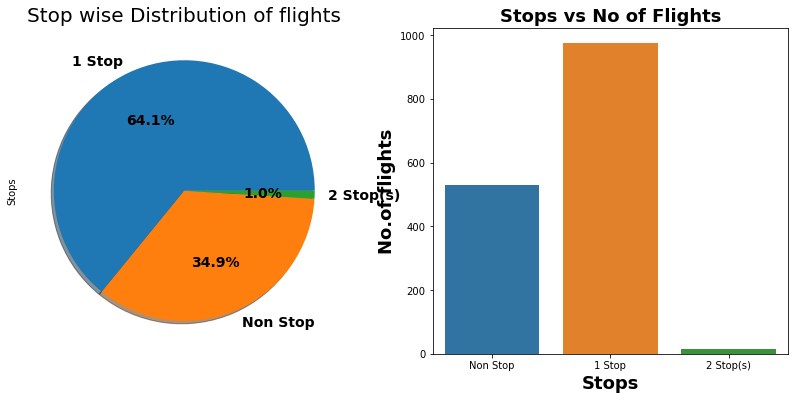

In [21]:
#counting No.of Stops
f,ax=plt.subplots(1,2,figsize=(14,6))
df['Stops'].value_counts().plot.pie(autopct='%2.1f%%',textprops={ 'fontsize':14,'fontweight':'bold'},ax=ax[0],shadow=True)
ax[0].set_title("Stop wise Distribution of flights",fontsize=20)
sns.countplot('Stops',data=df,ax=ax[1])
ax[1].set_title('Stops vs No of Flights',fontsize=18,fontweight='bold')
ax[1].set_xlabel("Stops",fontsize=18,fontweight='bold')
ax[1].set_ylabel("No.of flights",fontsize=18,fontweight='bold')
plt.show()

64.1% of flights are taking single stop in there way and 34.9% flights are Non stop flights and 1% flights are taking 2 stops

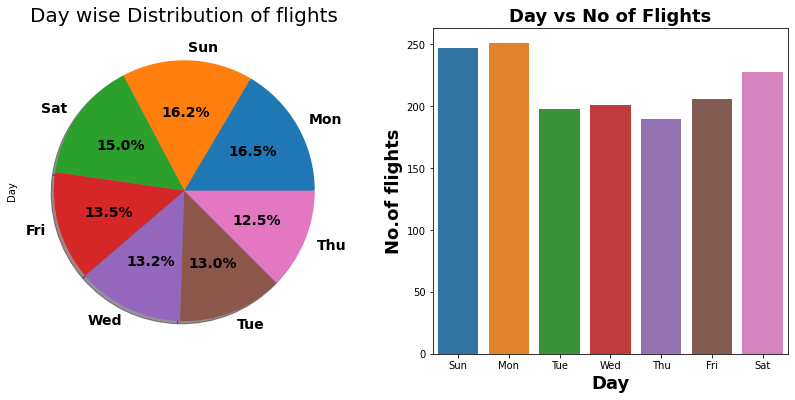

In [22]:
#Day-wise distribution of flights
f,ax=plt.subplots(1,2,figsize=(14,6))
df['Day'].value_counts().plot.pie(autopct='%2.1f%%',textprops={ 'fontsize':14,'fontweight':'bold'},ax=ax[0],shadow=True)
ax[0].set_title("Day wise Distribution of flights",fontsize=20)
sns.countplot('Day',data=df,ax=ax[1])
ax[1].set_title('Day vs No of Flights',fontsize=18,fontweight='bold')
ax[1].set_xlabel("Day",fontsize=18,fontweight='bold')
ax[1].set_ylabel("No.of flights",fontsize=18,fontweight='bold')
plt.show()

Monday There are more number of flights run and on Thursday less number of flights run

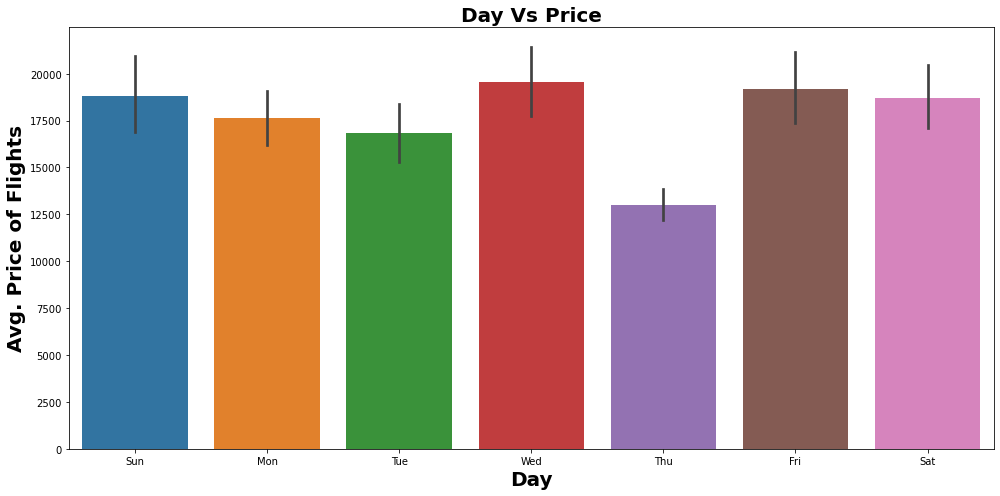

8579     445
8465      83
8578      51
22297     38
8714      35
21727     32
14141     32
9105      27
41281     26
30104     22
22152     20
22337     19
15920     17
25881     16
9242      14
13616     13
44328     12
14955     12
9630      11
46568     11
14781     11
12504     10
25730     10
13668     10
49256      9
45145      9
14264      8
13094      8
51193      8
9631       7
15193      7
10859      7
40105      7
15333      6
14668      6
32103      6
13820      6
40320      6
11843      6
25736      6
25120      5
16437      5
14981      5
43521      5
15720      5
15506      5
10155      5
36577      5
39091      5
8936       5
39671      4
21302      4
15350      4
52056      4
15716      4
19710      4
31996      4
40945      4
9293       4
47293      4
12465      4
15371      4
29237      4
40311      3
11025      3
55785      3
9650       3
29847      3
20128      3
52745      3
13511      3
32019      3
16033      3
13577      3
12863      3
8999       3
29241      3

In [23]:
#plotting Day  vs price
plt.figure(figsize =(14S,7))
sns.barplot(x=df['Day'],y=df['Price'])
plt.title("Day Vs Price",fontsize=20,fontweight ='bold')
plt.xlabel('Day',fontsize = 20,fontweight ='bold')
plt.ylabel('Avg. Price of Flights',fontsize = 20,fontweight ='bold')
plt.tight_layout()
plt.show()
df['Price'].value_counts()

In [24]:
df['Airlines'].value_counts()

IndiGo                326
Vistara               288
Vistara Business      255
Air India             196
Air India Business    173
Go First              121
SpiceJet              110
Air Asia               52
Name: Airlines, dtype: int64

### 6.Is Indigo Cheaper than SpiceJet

In [25]:
df.groupby('Airlines')['Price'].mean()

Airlines
Air Asia              10214.826923
Air India             12284.112245
Air India Business    33655.433526
Go First              10209.090909
IndiGo                 9146.190184
SpiceJet              10408.590909
Vistara               12297.715278
Vistara Business      36715.541176
Name: Price, dtype: float64

In [26]:
p=df.sort_values('Price')

### 7. Are morning flights expensive?

In [27]:
df.groupby('Depature_Time')['Price'].value_counts()

Depature_Time  Price
00:15          8579     15
02:10          8579      6
02:40          8579      4
04:45          8579      6
05:00          14852     3
               19220     1
05:05          8579      8
05:15          12504    10
               8579      6
               31996     4
               39682     2
               40292     2
05:20          13094     7
               8579      4
               14955     4
               10364     1
               13934     1
05:30          8579      5
               16541     2
               19232     1
               39470     1
               49840     1
05:45          8579      2
               10724     1
               12923     1
               13375     1
05:55          8578      5
               22152     3
               10155     1
               30104     1
               37048     1
06:00          8579     11
               10859     4
               10007     1
06:10          15920     8
               8579      1
       

Flights price are less at midnight and early in the morning

Tuesday Around Midnight is the Cheapest Time to Book

In [28]:
df.groupby('Day')['Price'].count()

Day
Fri    206
Mon    251
Sat    228
Sun    247
Thu    190
Tue    198
Wed    201
Name: Price, dtype: int64

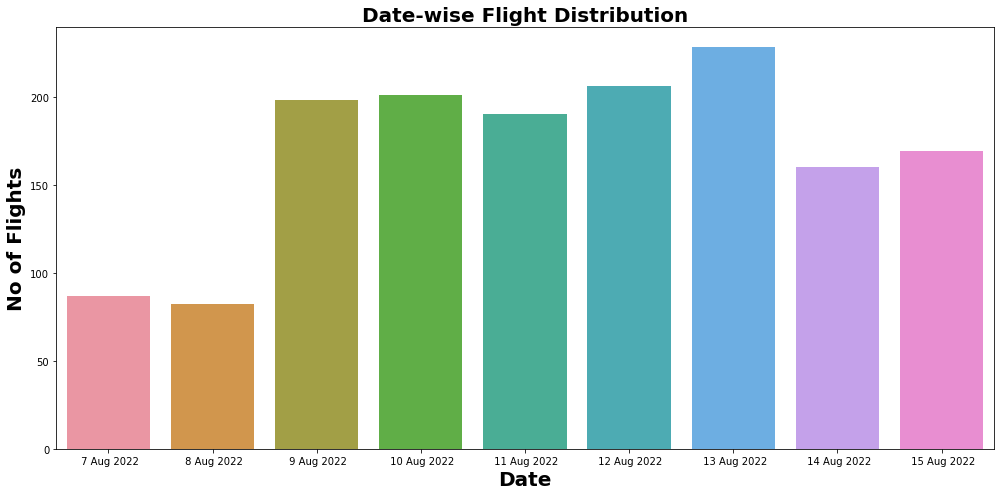

In [29]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('mako')
plt.figure(figsize =(14,7))
sns.countplot(x=df['Date'])
plt.title("Date-wise Flight Distribution",fontsize=20,fontweight ='bold')
plt.xlabel('Date',fontsize = 20,fontweight ='bold')
plt.ylabel('No of Flights',fontsize = 20,fontweight ='bold')
plt.tight_layout()
plt.show()

we can observe that maximum flights scheduled at 13-Aug and minimum flights scheduled on 8-Aug

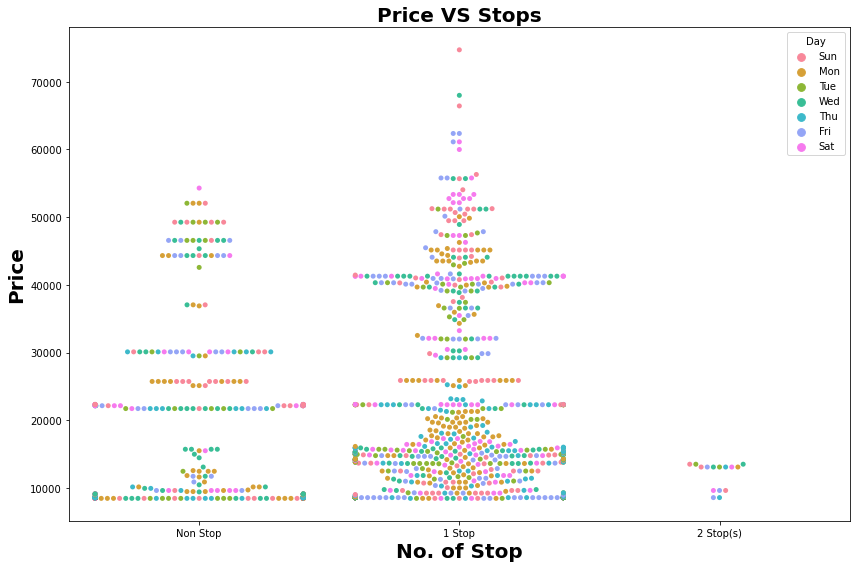

In [30]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('mako')
plt.figure(figsize =(12,8))
sns.swarmplot(y=df['Price'],x=df['Stops'], hue= df['Day'])
plt.title("Price VS Stops",fontsize=20,fontweight ='bold')
plt.xlabel('No. of Stop',fontsize = 20,fontweight ='bold')
plt.ylabel('Price',fontsize = 20,fontweight ='bold')
plt.tight_layout()
plt.show()

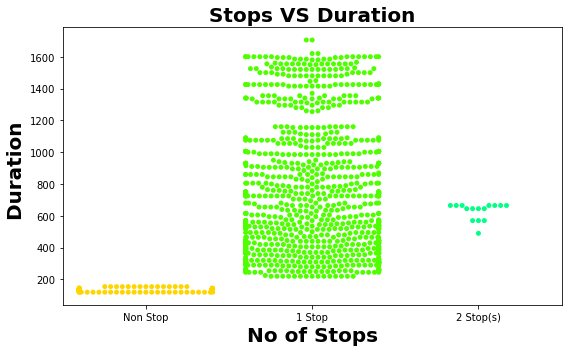

In [31]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('hsv')
plt.figure(figsize =(8,5))
sns.swarmplot(y=df['Duration'],x=df['Stops'])
plt.title("Stops VS Duration",fontsize=20,fontweight ='bold')
plt.xlabel('No of Stops',fontsize = 20,fontweight ='bold')
plt.ylabel('Duration ',fontsize = 20,fontweight ='bold')
plt.tight_layout()
plt.show()

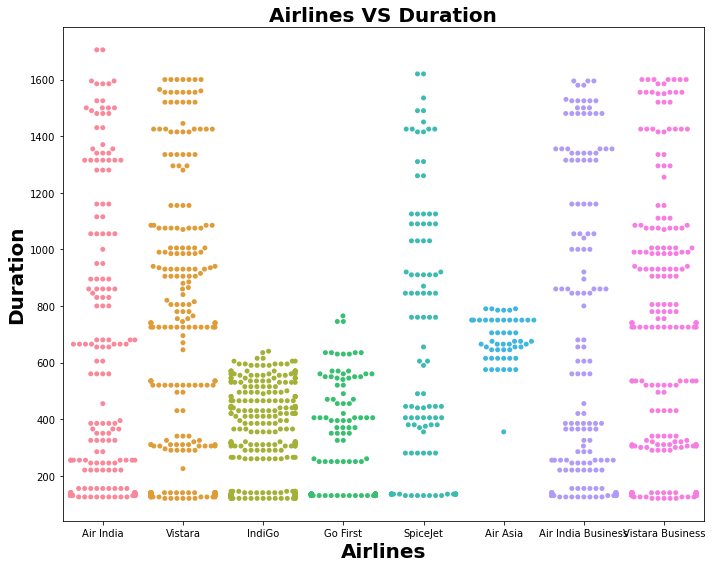

In [32]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow_r')
plt.figure(figsize =(10,8))
sns.swarmplot(x=df['Airlines'],y=df['Duration'])
plt.title("Airlines VS Duration",fontsize=20,fontweight ='bold')
plt.xlabel('Airlines',fontsize = 20,fontweight ='bold')
plt.ylabel('Duration',fontsize = 20,fontweight ='bold')
plt.tight_layout()
plt.show()

### Feature Engineering

1. Encoding categeorical data

In [33]:
#Dropping unnecesary columns
df.drop(columns=['Depature_Time','Arrival_time','Source','Destination'],inplace=True)

In [34]:
#Let's sort columns by their datatypes
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Duration', 'Price'], object: ['Airlines', 'Aerplane', 'Date', 'Stops', 'Day']}

In [35]:
categeorical=['Airlines','Aerplane','Date','Stops','Day']
Numerical=['Duration','Price']

In [36]:
df['Aerplane']=df['Aerplane'].map(lambda x: str(x).replace('-',''))
df['Aerplane']=df['Aerplane'].map(lambda x: str(x).replace('/',''))

In [37]:
#using label encoder for Transforming categeorical data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in categeorical:
    df[i]=le.fit_transform(df[i])
df.head()

,Airlines,Aerplane,Date,Stops,Duration,Price,Day
0,1,103,6,2,125,8465,3
1,1,84,6,2,130,8465,3
2,1,89,6,2,130,8465,3
3,1,85,6,2,135,8465,3
4,1,82,6,2,135,8465,3


### 2. Outliers Detection and removal

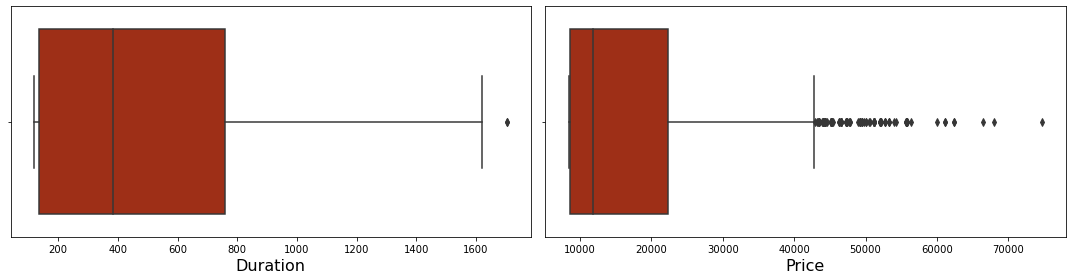

In [38]:
plt.figure(figsize=(15,4))
plt_num = 1
for i in Numerical:
    if plt_num <= 2:
        ax = plt.subplot(1,2,plt_num)
        sns.boxplot(df[i], palette='gnuplot')
        plt.xlabel(i, fontsize= 16)
    plt_num += 1
plt.show()

From the above graph we can observe that There are outliers present in the price column, since the data is realistic and error free we will proceed for building ML model without removing outliers

## Correlation

In [39]:
df.corr()

,Airlines,Aerplane,Date,Stops,Duration,Price,Day
Airlines,1.000000,0.682672,0.003009,0.031016,0.039892,0.257065,-0.018240
Aerplane,0.682672,1.000000,-0.005075,0.066818,0.146583,0.274997,-0.002604
Date,0.003009,-0.005075,1.000000,0.031381,-0.048494,0.075017,-0.107706
Stops,0.031016,0.066818,0.031381,1.000000,-0.662088,-0.166766,-0.018455
Duration,0.039892,0.146583,-0.048494,-0.662088,1.000000,0.246610,0.052209
Price,0.257065,0.274997,0.075017,-0.166766,0.246610,1.000000,-0.031221
Day,-0.018240,-0.002604,-0.107706,-0.018455,0.052209,-0.031221,1.000000


<AxesSubplot:>

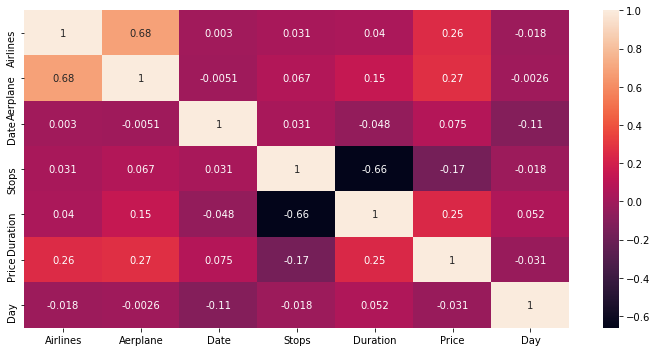

In [40]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

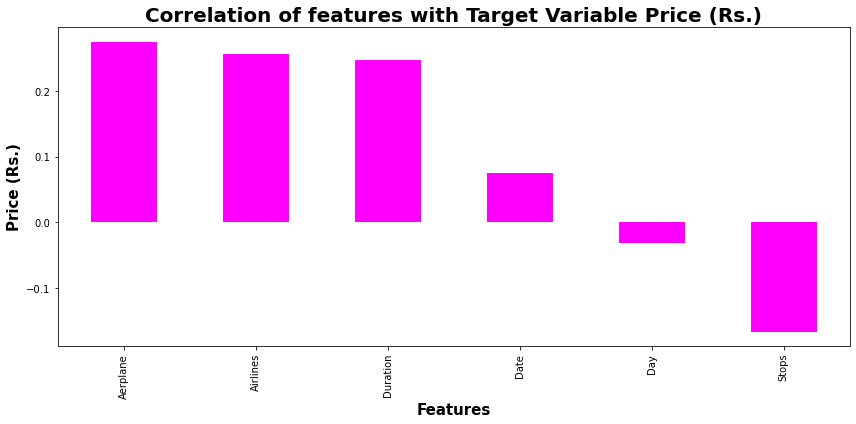

In [41]:
plt.figure(figsize = (12,6))
df.corr()['Price'].drop(['Price']).sort_values(ascending=False).plot(kind='bar',cmap = 'spring')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Price (Rs.)',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Price (Rs.)',fontsize = 20,fontweight='bold')
plt.show()

Airlines and Aeroplane are 26% and 27% correlated with price column and all the other columns are poorly correlated with price

## Skewness

In [42]:
df.skew()

Airlines   -0.229666
Aerplane    0.101154
Date        0.330741
Stops       0.610989
Duration    1.003800
Price       1.492503
Day         0.108128
dtype: float64

we can see all the columns are under the threshold value of skewness i.e -0.5-+0.5 The Duration is above the threshold value

## seperating target variable

In [ ]:
x=df.drop(['Price'],axis=1)
y=df['Price']

## Transforming data to remove skewness we use powerTransformation method

In [44]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-1.46108244, -0.1986708 ,  0.94704414,  1.34603883, -1.25774029,
         0.15285874],
       [-1.46108244, -0.44585067,  0.94704414,  1.34603883, -1.20843635,
         0.15285874],
       [-1.46108244, -0.37886408,  0.94704414,  1.34603883, -1.20843635,
         0.15285874],
       ...,
       [-0.99453226, -0.80742074,  0.30590934, -0.74778627, -0.38609333,
         0.15285874],
       [-0.99453226, -0.73096452,  0.30590934, -0.74778627,  1.54763809,
         0.15285874],
       [ 1.34765059,  1.15630847,  0.30590934,  1.34603883, -1.25774029,
         0.15285874]])

## scaling the data using StandardScaler

In [45]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.46108244, -0.1986708 ,  0.94704414,  1.34603883, -1.25774029,
         0.15285874],
       [-1.46108244, -0.44585067,  0.94704414,  1.34603883, -1.20843635,
         0.15285874],
       [-1.46108244, -0.37886408,  0.94704414,  1.34603883, -1.20843635,
         0.15285874],
       ...,
       [-0.99453226, -0.80742074,  0.30590934, -0.74778627, -0.38609333,
         0.15285874],
       [-0.99453226, -0.73096452,  0.30590934, -0.74778627,  1.54763809,
         0.15285874],
       [ 1.34765059,  1.15630847,  0.30590934,  1.34603883, -1.25774029,
         0.15285874]])

In [46]:
pd.DataFrame(x).skew()

0   -0.226505
1   -0.237270
2   -0.119992
3    0.592574
4    0.037567
5   -0.155961
dtype: float64

## Checking VIF

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['Features']=pd.DataFrame(x).columns
vif

,vif,Features
0,1.627605,0
1,1.757096,1
2,1.041977,2
3,4.102141,3
4,4.150025,4
5,1.041209,5


All the features are lessthan the cutoff value of vif i.e<5

# Model Building

since our target variable continuous variable so we use regression model

In [57]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [103]:
#creating a function to run all the regressors
def regressor(model,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=63)
    
    #training the model
    model.fit(x_train,y_train)
    
    #predicting the model
    pred=model.predict(x_test)
    
    print("Mean Squared Error is:",mean_squared_error(y_test,pred))
    
    print('Mean absolute error :', mean_absolute_error(y_test,pred))
    
    print('Root Mean squared error :', np.sqrt(mean_squared_error(y_test, pred)))

    print("r2_score is:",r2_score(y_test,pred))
    
    print("cross_validation_score is:",cross_val_score(model,x_train,y_train,cv=5).mean())
    

# LinearRegression

In [104]:
model=LinearRegression()
regressor(model,x,y)

Mean Squared Error is: 158425632.10147795
Mean absolute error : 9465.07957596196
Root Mean squared error : 12586.72443892683
r2_score is: 0.1147413697703511
cross_validation_score is: 0.1360295732706547


# Support Vector Regressor

In [105]:
model=SVR(kernel='rbf')
regressor(model,x,y)

Mean Squared Error is: 222408560.446919
Mean absolute error : 9373.908605320747
Root Mean squared error : 14913.368514420845
r2_score is: -0.24278562099390744
cross_validation_score is: -0.2130841144204668


In [106]:
model=SVR(kernel='poly')
regressor(model,x,y)

Mean Squared Error is: 221899185.90483028
Mean absolute error : 9359.75847910728
Root Mean squared error : 14896.280942061689
r2_score is: -0.23993931258142487
cross_validation_score is: -0.21193738746425378


In [107]:
model=SVR(kernel='linear')
regressor(model,x,y)

Mean Squared Error is: 220876786.05114457
Mean absolute error : 9052.340346266967
Root Mean squared error : 14861.924035976788
r2_score is: -0.23422629580494103
cross_validation_score is: -0.2022495135393517


# DecissionTreeRegressor

In [108]:
model=DecisionTreeRegressor(random_state=63)
regressor(model,x,y)

Mean Squared Error is: 33590423.2
Mean absolute error : 2564.937704918033
Root Mean squared error : 5795.724562123359
r2_score is: 0.8123017618019097
cross_validation_score is: 0.8448283365180489


# RandomForestRegressor

In [109]:
model=RandomForestRegressor()
regressor(model,x,y)

Mean Squared Error is: 25035376.16151639
Mean absolute error : 2351.9494098360656
Root Mean squared error : 5003.536365563499
r2_score is: 0.8601060793380212
cross_validation_score is: 0.9202471941836606


# KNN

In [110]:
model=KNeighborsRegressor()
regressor(model,x,y)

Mean Squared Error is: 40797719.06963934
Mean absolute error : 3861.632786885246
Root Mean squared error : 6387.309219823269
r2_score is: 0.7720284753104292
cross_validation_score is: 0.7341759542606537


# SGDRegressor

In [111]:
model=SGDRegressor()
regressor(model,x,y)

Mean Squared Error is: 158453316.65834534
Mean absolute error : 9502.235432641428
Root Mean squared error : 12587.824143129159
r2_score is: 0.11458667262591904
cross_validation_score is: 0.13698461099081888


# GradientBoostRegressor

In [112]:
model=GradientBoostingRegressor()
regressor(model,x,y)

Mean Squared Error is: 22428274.88701833
Mean absolute error : 2716.1451342803516
Root Mean squared error : 4735.849964580628
r2_score is: 0.8746741695675984
cross_validation_score is: 0.9069393244105013


# AdaBoostRegressor

In [113]:
model=AdaBoostRegressor()
regressor(model,x,y)

Mean Squared Error is: 33010145.75996408
Mean absolute error : 4421.682935308756
Root Mean squared error : 5745.445653729925
r2_score is: 0.8155442649556313
cross_validation_score is: 0.8235625442494718


we are getting GradientBoostingRegressor r2_score as 87% and crossvalidation score as 90% so we accept this model and perform Hyper parameter tuning

# Hyper Parameter Tuning

In [114]:
# creating parameters list to pass into GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=63)
parameters = {'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],
              'learning_rate': [0.1 , 0.5 , 1, 1.5],
              'criterion': ['friedman_mse', 'squared_error', 'mse'],
              'max_depth' : [3 , 4 ,5 ],
              'max_features' : ['auto', 'sqrt', 'log2']}
GCV = GridSearchCV(GradientBoostingRegressor(), parameters, cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'learning_rate': [0.1, 0.5, 1, 1.5],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_depth': [3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [115]:
GCV.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 5,
 'max_features': 'auto'}

In [116]:
final_model=GradientBoostingRegressor(criterion='mse',learning_rate=0.1,loss='squared_error',max_depth=5,max_features='auto')

In [117]:
final_fit=final_model.fit(x_train,y_train)

In [118]:
final_pred=final_model.predict(x_test)

In [119]:
best_r2=r2_score(y_test,final_pred,multioutput='variance_weighted')*100
print('Best r2_score:',best_r2)

Best r2_score: 88.21518610750367


In [121]:
print("cross_validation_score is:",cross_val_score(final_model,x_train,y_train,cv=5).mean())

cross_validation_score is: 0.922484471405728


In [122]:
df=pd.DataFrame({"Actual":y_test,"Predicted":final_pred})
df

,Actual,Predicted
954,8579,9367.413124
1311,44081,41626.423239
202,8465,8713.261420
1170,25881,24128.287848
1446,22337,22529.838562
1452,30104,33029.163973
137,9105,10078.062505
1444,22337,22892.443204
1384,39184,32348.452648
67,8578,8532.859401


#### conclusion: After Hyper parameter tuning we are getting GradientBoostingRegressor r2_score as 88% and cross validation score as 92% so we accept this model

### Saving the model

In [124]:
import pickle
filename='flight_price_prediction.pkl'
pickle.dump(GCV,open(filename,'wb'))